In [1]:
import numpy as np 
import pandas as pd

import gc


In [2]:
seasons = list(range(2007, 2019))
seasons

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [3]:
# only have to run once
master_df = None
for season in seasons:
    season_start = str(season)
    season_end = str(season+1)[-2:]
    season_str = season_start + '-' + season_end
    load_path = './vegas_lines/ncaa_basketball_'+season_str+'.csv'
    season_df = pd.read_csv(load_path)
    season_df['Season'] = str(season+1)
    season_df = season_df[['Season','1st', '2H', '2nd', 'Close', 'Date', 'Final', 'ML', 'Open', 'Rot', 'Team','VH']]
    season_df['Season'] = season_df['Season'].copy().astype(str)
    if master_df is not None:
        master_df = pd.concat([master_df,season_df],axis=0)
    else:
        master_df = season_df

master_df.to_csv('./output/lines_2007-2019.csv',index=None)

In [4]:
vegas = pd.read_csv('./output/lines_2007-2019.csv')

In [5]:
print(list(vegas))

['Season', '1st', '2H', '2nd', 'Close', 'Date', 'Final', 'ML', 'Open', 'Rot', 'Team', 'VH']


In [6]:
print(len(vegas))

95730


In [7]:
vegas = vegas[['Season','1st', '2H', '2nd', 'Close', 'Date', 'Final', 'ML', 'Open', 'Rot', 'Team','VH']]
vegas.head()

,Season,1st,2H,2nd,Close,Date,Final,ML,Open,Rot,Team,VH
0,2008,23.0,65.5,19.0,127.5,1105,42.0,200,127,503,Maine,N
1,2008,23.0,3.5,21.0,5.5,1105,44.0,-240,8.5,504,Richmond,N
2,2008,36.0,75,35.0,144,1105,71.0,13000,140,505,TennMartin,V
3,2008,49.0,16,53.0,35.5,1105,102.0,-39000,35,506,MemphisU,H
4,2008,34.0,71.5,35.0,3,1106,69.0,-160,4,721,GardnerWebb,N


In [8]:
def preprocessing(df):
    
    df = df.copy().replace('pk','0')
    df = df.copy().replace('p','0')
    
    
    return df

In [9]:
vegas = preprocessing(vegas)


In [10]:
num_games = int(len(vegas)/2)
num_games

47865

In [11]:
l = ['Team1','Team2']
l_teams = np.tile(l, num_games)
vegas.loc[:,'Teams'] = l_teams
vegas.head()

,Season,1st,2H,2nd,Close,Date,Final,ML,Open,Rot,Team,VH,Teams
0,2008,23.0,65.5,19.0,127.5,1105,42.0,200,127,503,Maine,N,Team1
1,2008,23.0,3.5,21.0,5.5,1105,44.0,-240,8.5,504,Richmond,N,Team2
2,2008,36.0,75,35.0,144,1105,71.0,13000,140,505,TennMartin,V,Team1
3,2008,49.0,16,53.0,35.5,1105,102.0,-39000,35,506,MemphisU,H,Team2
4,2008,34.0,71.5,35.0,3,1106,69.0,-160,4,721,GardnerWebb,N,Team1


In [12]:
vegas.tail()

,Season,1st,2H,2nd,Close,Date,Final,ML,Open,Rot,Team,VH,Teams
95725,2019,21.0,1,30.0,2,406,51.0,-140,2.5,802,MichiganState,H,Team2
95726,2019,31.0,70.5,31.0,132,406,62.0,260,130,803,Auburn,V,Team1
95727,2019,28.0,5.5,35.0,6.5,406,63.0,-330,5,804,Virginia,H,Team2
95728,2019,29.0,0.5,39.0,119.5,408,77.0,116,118,811,TexasTech,V,Team1
95729,2019,32.0,65.5,36.0,2,408,85.0,-136,1,812,Virginia,H,Team2


In [13]:
print(len(vegas.values))
new_vegas = pd.DataFrame(vegas.values.reshape(-1,26),columns=[
    'SeasonA','1stA','2HA','2ndA','CloseA','DateA','FinalA','MLA','OpenA','RotA','TeamA','VHA','TeamsA',
    'SeasonB','1stB','2HB','2ndB','CloseB','DateB','FinalB','MLB','OpenB','RotB','TeamB','VHB','TeamsB',
])
print(len(new_vegas))

95730
47865


In [14]:
new_vegas.head()

,SeasonA,1stA,2HA,2ndA,CloseA,DateA,FinalA,MLA,OpenA,RotA,...,2ndB,CloseB,DateB,FinalB,MLB,OpenB,RotB,TeamB,VHB,TeamsB
0,2008,23,65.5,19,127.5,1105,42,200,127,503,...,21,5.5,1105,44,-240,8.5,504,Richmond,N,Team2
1,2008,36,75,35,144,1105,71,13000,140,505,...,53,35.5,1105,102,-39000,35,506,MemphisU,H,Team2
2,2008,34,71.5,35,3,1106,69,-160,4,721,...,32,139.5,1106,55,140,132.5,722,AlabamaA&M,N,Team2
3,2008,20,70,20,134,1106,40,3000,138,723,...,33,26.5,1106,67,-7000,28,724,Kentucky,H,Team2
4,2008,31,68,31,128,1106,62,105,131,725,...,35,1.5,1106,66,-125,3,726,TennMartin,N,Team2


In [15]:
new_vegas.tail()

,SeasonA,1stA,2HA,2ndA,CloseA,DateA,FinalA,MLA,OpenA,RotA,...,2ndB,CloseB,DateB,FinalB,MLB,OpenB,RotB,TeamB,VHB,TeamsB
47860,2019,42,89.5,28,169,404,70,185,171,733,...,50,5,404,90,-230,5.5,734,Marshall,H,Team2
47861,2019,39,78,38,146.5,405,77,105,145,735,...,31,1.5,405,65,-125,2,736,Depaul,H,Team2
47862,2019,23,68.5,38,133.5,406,61,120,133,801,...,30,2,406,51,-140,2.5,802,MichiganState,H,Team2
47863,2019,31,70.5,31,132,406,62,260,130,803,...,35,6.5,406,63,-330,5,804,Virginia,H,Team2
47864,2019,29,0.5,39,119.5,408,77,116,118,811,...,36,2,408,85,-136,1,812,Virginia,H,Team2


In [16]:
del vegas
gc.collect()

80

In [17]:
# more preprocessing

def more_pp(df):
    
    df = df.drop(columns=['TeamsA','TeamsB','DateB','VHB','RotA','RotB','SeasonB'])
    
    df = df.rename(columns={'SeasonA':'Season'})
    
    
    df = df.loc[df['2HA']!='NL']
    df = df.loc[df['MLA']!='NL']
    df = df.loc[df['2HB']!='NL']
    df = df.loc[df['MLB']!='NL']
    df = df.loc[df['OpenA'] != 'NL']
    df = df.loc[df['OpenB'] != 'NL']
    df = df.loc[df['CloseA'] != 'NL']
    df = df.loc[df['CloseB'] != 'NL']
    
    str_cols = ['Season','TeamA','TeamB','DateA','VHA']
    
    for col in list(df):
        if col not in str_cols:
            df[col] = df[col].copy().astype(float)
    return df

vegas = more_pp(new_vegas)

del new_vegas
gc.collect()

0

In [18]:
vegas.head(5)

,Season,1stA,2HA,2ndA,CloseA,DateA,FinalA,MLA,OpenA,TeamA,VHA,1stB,2HB,2ndB,CloseB,FinalB,MLB,OpenB,TeamB
0,2008,23.0,65.5,19.0,127.5,1105,42.0,200.0,127.0,Maine,N,23.0,3.5,21.0,5.5,44.0,-240.0,8.5,Richmond
1,2008,36.0,75.0,35.0,144.0,1105,71.0,13000.0,140.0,TennMartin,V,49.0,16.0,53.0,35.5,102.0,-39000.0,35.0,MemphisU
2,2008,34.0,71.5,35.0,3.0,1106,69.0,-160.0,4.0,GardnerWebb,N,23.0,1.0,32.0,139.5,55.0,140.0,132.5,AlabamaA&M
3,2008,20.0,70.0,20.0,134.0,1106,40.0,3000.0,138.0,CentralArkansas,V,34.0,11.5,33.0,26.5,67.0,-7000.0,28.0,Kentucky
4,2008,31.0,68.0,31.0,128.0,1106,62.0,105.0,131.0,Maine,N,31.0,1.0,35.0,1.5,66.0,-125.0,3.0,TennMartin


In [19]:
vegas['ActualTotal'] = vegas['FinalA'].copy() + vegas['FinalB'].copy()

In [20]:
vegas['OpeningTotal'] = vegas[['OpenA','OpenB']].max(axis=1)
vegas['ClosingTotal'] = vegas[['CloseA','CloseB']].max(axis=1)
vegas['TempOpeningLine'] = vegas[['OpenA','OpenB']].min(axis=1)
vegas['TempClosingLine'] = vegas[['CloseA','CloseB']].min(axis=1)

vegas['ProjDiffOpen'] = np.where(vegas['OpenA']==vegas['TempOpeningLine'], vegas['OpenA'], -1*vegas['OpenB'])
vegas['ProjDiffClose'] = np.where(vegas['CloseA']==vegas['TempClosingLine'], vegas['CloseA'], -1*vegas['CloseB'])

vegas = vegas.drop(columns=['TempOpeningLine','TempClosingLine'])
vegas['ActualDiff'] = vegas['FinalA'].copy() - vegas['FinalB'].copy()

In [21]:
vegas.head()

,Season,1stA,2HA,2ndA,CloseA,DateA,FinalA,MLA,OpenA,TeamA,...,FinalB,MLB,OpenB,TeamB,ActualTotal,OpeningTotal,ClosingTotal,ProjDiffOpen,ProjDiffClose,ActualDiff
0,2008,23.0,65.5,19.0,127.5,1105,42.0,200.0,127.0,Maine,...,44.0,-240.0,8.5,Richmond,86.0,127.0,127.5,-8.5,-5.5,-2.0
1,2008,36.0,75.0,35.0,144.0,1105,71.0,13000.0,140.0,TennMartin,...,102.0,-39000.0,35.0,MemphisU,173.0,140.0,144.0,-35.0,-35.5,-31.0
2,2008,34.0,71.5,35.0,3.0,1106,69.0,-160.0,4.0,GardnerWebb,...,55.0,140.0,132.5,AlabamaA&M,124.0,132.5,139.5,4.0,3.0,14.0
3,2008,20.0,70.0,20.0,134.0,1106,40.0,3000.0,138.0,CentralArkansas,...,67.0,-7000.0,28.0,Kentucky,107.0,138.0,134.0,-28.0,-26.5,-27.0
4,2008,31.0,68.0,31.0,128.0,1106,62.0,105.0,131.0,Maine,...,66.0,-125.0,3.0,TennMartin,128.0,131.0,128.0,-3.0,-1.5,-4.0


In [22]:
import math 

dates = vegas['DateA'].values
seasons = vegas['Season'].values

assert(len(dates) == len(seasons))
assert(len(dates) == len(vegas))


fdates = []
for idx,d in enumerate(dates):
    d = str(d)
    month = d[:-2]
    day = d[-2:]
    season = seasons[idx]
    if int(month) >= 9:
        season -= 1
    format_date = str(month)+'-'+str(day)+'-'+str(season)
    fdates.append(format_date)

fdate_series = pd.Series(fdates, name='Date')

vegas = vegas.reset_index(drop=True)
vegas['Date'] = fdate_series.copy()

In [24]:
def mae(y_pred, y):
    return np.abs(y_pred - y)

vegas = vegas.dropna(subset=['ActualDiff'])
print(vegas.ActualDiff.isna().sum(axis=0))

vegas['Open_MAE'] = vegas.apply(lambda x: mae(x.ProjDiffOpen, x.ActualDiff), axis=1)
vegas['Close_MAE'] = vegas.apply(lambda x: mae(x.ProjDiffClose, x.ActualDiff), axis=1)
vegas['OpenTot_MAE'] = vegas.apply(lambda x: mae(x.OpeningTotal, x.ActualTotal), axis=1)
vegas['CloseTot_MAE'] = vegas.apply(lambda x: mae(x.ClosingTotal, x.ActualTotal), axis=1)

0


In [25]:
print(vegas['Open_MAE'].mean())
print(vegas['Close_MAE'].mean())

8.483293534105815
8.410991159269786


In [24]:
vegas['FavA'] = np.where(vegas['MLA'] < 0, 1, 0)
vegas['FavB'] = np.where(vegas['MLB'] < 0, 1, 0)
vegas['TotalFavs'] = vegas['FavA'].copy()+vegas['FavB'].copy()

In [25]:
# inspect = vegas.loc[vegas['TotalFavs']==2]

# inspect[['MLA','MLB']].tail(50)

vegas = vegas.drop(columns=['FavA','FavB','TotalFavs'])

In [26]:
mean_err = vegas.groupby(['Season'])['Open_MAE','Close_MAE','OpenTot_MAE','CloseTot_MAE'].mean().reset_index()

mean_err

,Season,Open_MAE,Close_MAE,OpenTot_MAE,CloseTot_MAE
0,2008,8.342220,8.287733,13.964889,13.617279
1,2009,8.402135,8.326661,13.947657,13.364620
2,2010,8.086010,8.037834,13.303339,13.095072
3,2011,8.323211,8.274011,13.706921,13.490113
4,2012,8.248440,8.189302,13.102972,12.961516
5,2013,8.484665,8.388216,13.191283,12.999596
6,2014,8.363191,8.274318,14.413226,13.773268
7,2015,8.324985,8.263897,13.574527,13.274588
8,2016,8.434979,8.344943,13.651832,13.459752
9,2017,8.688231,8.652613,13.424858,13.259700


In [27]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(13, 7))    
    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.plot(mean_err.Season.values,
         mean_err.Open_MAE.values,
         lw=2.5,
        label='Opening Line Error') 
plt.plot(mean_err.Season.values,
         mean_err.Close_MAE.values,
         lw=2.5,label='Closing Line Error') 

plt.title('Vegas College Basketball Line Mean Absolute Error Over Time')
plt.xlabel('Season')
plt.ylabel('Error')
plt.legend()

plt.savefig('./figures/line_errors.png')

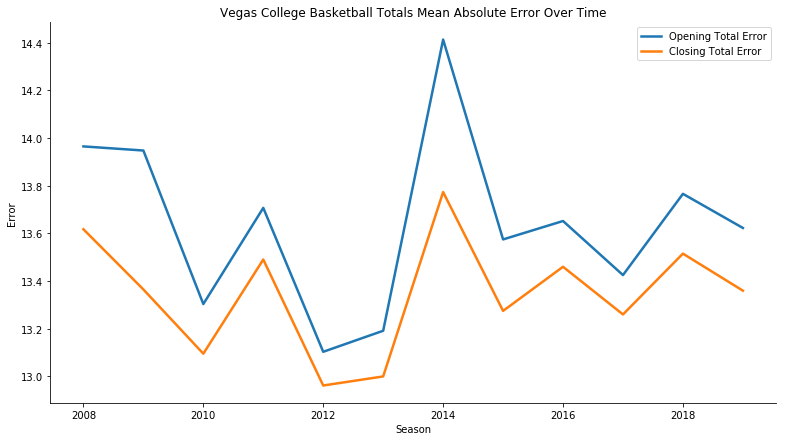

In [28]:
fig = plt.figure(figsize=(13, 7))    
    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.plot(mean_err.Season.values,
         mean_err.OpenTot_MAE.values,
         lw=2.5,
        label='Opening Total Error') 
plt.plot(mean_err.Season.values,
         mean_err.CloseTot_MAE.values,
         lw=2.5,label='Closing Total Error') 

plt.title('Vegas College Basketball Totals Mean Absolute Error Over Time')
plt.xlabel('Season')
plt.ylabel('Error')
plt.legend()

plt.savefig('./figures/line_errors_totals.png')

In [29]:
vegas['StartYear'] = vegas['Season'].astype(int) - 1

In [30]:
vegas['OpeningDate'] = '10-28-'+ vegas['StartYear'].astype(str)

In [31]:
vegas['DayOfSeason'] = pd.to_datetime(vegas['Date']) - pd.to_datetime(vegas['OpeningDate'])
vegas['DayOfSeason'] = vegas['DayOfSeason'].dt.days.astype('int16')

print(vegas[['Date','OpeningDate','DayOfSeason']].head())

         Date OpeningDate  DayOfSeason
0  11-05-2007  10-28-2007            8
1  11-05-2007  10-28-2007            8
2  11-06-2007  10-28-2007            9
3  11-06-2007  10-28-2007            9
4  11-06-2007  10-28-2007            9


In [32]:
# get rid of some small samples near tails & near Christmas
vegas.loc[vegas['DayOfSeason'] <= 13, 'DayOfSeason'] = 13
vegas.loc[vegas['DayOfSeason'] >= 150, 'DayOfSeason'] = 150
vegas.loc[((vegas['DayOfSeason'] >= 55)&(vegas['DayOfSeason'] <= 60)), 'DayOfSeason'] = 55

os = vegas.groupby(['DayOfSeason'])['Open_MAE','Close_MAE'].mean().reset_index()
os_tot = vegas.groupby(['DayOfSeason'])['OpenTot_MAE','CloseTot_MAE'].mean().reset_index()



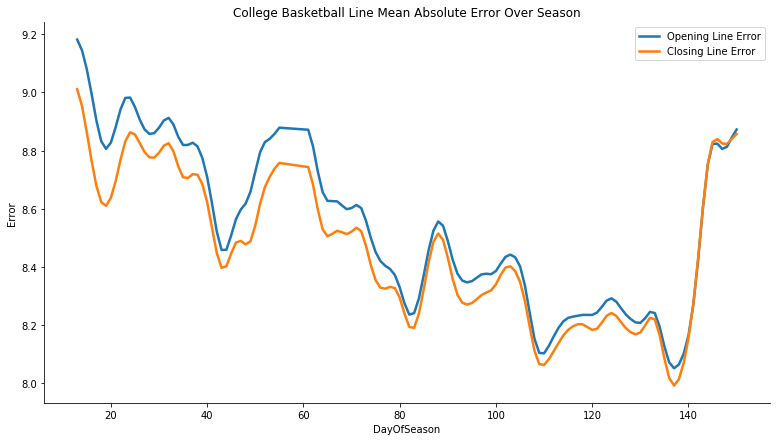

In [36]:
from scipy.ndimage.filters import gaussian_filter1d

vegas = vegas.sort_values(by=['DayOfSeason'])

fig = plt.figure(figsize=(13, 7))    
    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.plot(os.DayOfSeason.values,
         gaussian_filter1d(os.Open_MAE.values,sigma=2),
         lw=2.5, label='Opening Line Error') 
plt.plot(os.DayOfSeason.values,
         gaussian_filter1d(os.Close_MAE.values,sigma=2),
         lw=2.5,label='Closing Line Error') 

plt.title('College Basketball Line Mean Absolute Error Over Season')
plt.xlabel('DayOfSeason')
plt.ylabel('Error')
plt.legend()

plt.savefig('./figures/os_line_errors.png')

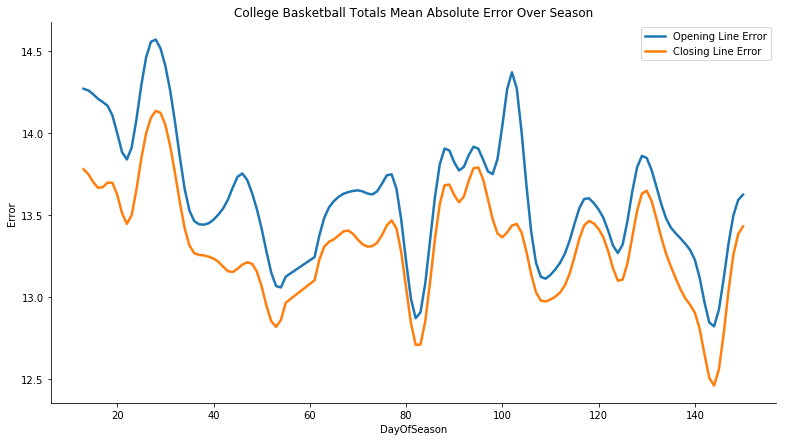

In [38]:
fig = plt.figure(figsize=(13, 7))    
    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.plot(os_tot.DayOfSeason.values,
         gaussian_filter1d(os_tot.OpenTot_MAE.values,sigma=2),
         lw=2.5, label='Opening Line Error') 
plt.plot(os_tot.DayOfSeason.values,
         gaussian_filter1d(os_tot.CloseTot_MAE.values,sigma=2),
         lw=2.5,label='Closing Line Error') 

plt.title('College Basketball Totals Mean Absolute Error Over Season')
plt.xlabel('DayOfSeason')
plt.ylabel('Error')
plt.legend()

plt.savefig('./figures/os_tot_line_errors.png')